## Speech to Text 

In [128]:
def hear():
    import speech_recognition as sr
    ear = sr.Recognizer()
    with sr.Microphone() as sourse:    
        print("listening...")
        audio = ear.listen(sourse)
        try:
            text = ear.recognize_google(audio)
            print(text)
        except:
            print("i didn't get that...")

hear()


listening...
good morning


### Using Audio File

In [85]:
cd C:\Users\feljo\OneDrive\Documents\Machine Learing

C:\Users\feljo\OneDrive\Documents\Machine Learing


In [86]:
r = sr.Recognizer()
harvard = sr.AudioFile('audiofilemain.wav')      # initialize recognizer
with harvard as source:# mention source it will be either Microphone or audio files.
    audio = r.record(source)
    type(audio)
    try:
        text = r.recognize_google(audio)    # use recognizer to convert our audio into text part.
        print("You said : {}".format(text))
    except:
        print("Sorry could not recognize your voice") 

You said : the birch canoes Madonna Smyths bikes blue the sea to the dark blue background it is easy to tell the death of a well these days a chicken Leg is a radish rice is often served in rambles the juice of lemons makes fine punch the box was down beside the park chuck the houses which have corn and garbage 4 hours of study work faced as a large thighs in stockings is hard to sell


## Simple keyword frequency Analysis

In [51]:
import numpy as np
import pandas as pd

In [108]:
import pandas as pd
data = pd.read_csv(r"C:\Users\feljo\OneDrive\Documents\Machine Learing\train\train.csv")
data['text'].head(10)

0    This process, however, afforded me no means of...
1    It never once occurred to me that the fumbling...
2    In his left hand was a gold snuff box, from wh...
3    How lovely is spring As we looked from Windsor...
4    Finding nothing else, not even gold, the Super...
5    A youth passed in solitude, my best years spen...
6    The astronomer, perhaps, at this point, took r...
7          The surcingle hung in ribands from my body.
8    I knew that you could not say to yourself 'ste...
9    I confess that neither the structure of langua...
Name: text, dtype: object

### Romove punctuations

In [60]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [109]:
data['text'] = data['text'].apply(remove_punctuation)
data['text'].head(10)

0    This process however afforded me no means of a...
1    It never once occurred to me that the fumbling...
2    In his left hand was a gold snuff box from whi...
3    How lovely is spring As we looked from Windsor...
4    Finding nothing else not even gold the Superin...
5    A youth passed in solitude my best years spent...
6    The astronomer perhaps at this point took refu...
7           The surcingle hung in ribands from my body
8    I knew that you could not say to yourself ster...
9    I confess that neither the structure of langua...
Name: text, dtype: object

### Remove of Stopwords

In [65]:
from nltk.corpus import stopwords
#Removing Stopwords
# extracting the stopwords from nltk library
sw = stopwords.words('english')
# displaying the stopwords
np.array(sw)
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [112]:
data['text'] = data['text'].apply(stopwords)
data['text'].head(4)

0    process however afforded means ascertaining di...
1           never occurred fumbling might mere mistake
2    left hand gold snuff box capered hill cutting ...
3    lovely spring looked windsor terrace sixteen f...
Name: text, dtype: object

### Stemming

In [114]:
from nltk.stem.snowball import SnowballStemmer
# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

data['text'] = data['text'].apply(stemming)
data['text'].head(10)

0    process howev afford mean ascertain dimens dun...
1                  never occur fumbl might mere mistak
2    left hand gold snuff box caper hill cut manner...
3    love spring look windsor terrac sixteen fertil...
4    find noth els even gold superintend abandon at...
5    youth pass solitud best year spent gentl femin...
6    astronom perhap point took refug suggest non l...
7                            surcingl hung riband bodi
8    knew could say stereotomi without brought thin...
9    confess neither structur languag code govern p...
Name: text, dtype: object

### Tokenization

In [113]:
from nltk.tokenize import word_tokenize

df = pd.DataFrame({'sentences': data.text})
tokenized_sents = df.apply(lambda row: word_tokenize(row['sentences']), axis=1)

tokenized_sents
L1=tokenized_sents
flat=[]
for i in L1:
  for j in i:
    flat.append(j)
print (flat)

['process', 'however', 'afforded', 'means', 'ascertaining', 'dimensions', 'dungeon', 'might', 'make', 'circuit', 'return', 'point', 'whence', 'set', 'without', 'aware', 'fact', 'perfectly', 'uniform', 'seemed', 'wall', 'never', 'occurred', 'fumbling', 'might', 'mere', 'mistake', 'left', 'hand', 'gold', 'snuff', 'box', 'capered', 'hill', 'cutting', 'manner', 'fantastic', 'steps', 'took', 'snuff', 'incessantly', 'air', 'greatest', 'possible', 'self', 'satisfaction', 'lovely', 'spring', 'looked', 'windsor', 'terrace', 'sixteen', 'fertile', 'counties', 'spread', 'beneath', 'speckled', 'happy', 'cottages', 'wealthier', 'towns', 'looked', 'former', 'years', 'heart', 'cheering', 'fair', 'finding', 'nothing', 'else', 'even', 'gold', 'superintendent', 'abandoned', 'attempts', 'perplexed', 'look', 'occasionally', 'steals', 'countenance', 'sits', 'thinking', 'desk', 'youth', 'passed', 'solitude', 'best', 'years', 'spent', 'gentle', 'feminine', 'fosterage', 'refined', 'groundwork', 'character', 'c

### Parts of Speech tagging

In [75]:
import nltk
al_pos = nltk.pos_tag(flat)
al_pos

[('process', 'NN'),
 ('however', 'RB'),
 ('afforded', 'VBD'),
 ('means', 'NNS'),
 ('ascertaining', 'VBG'),
 ('dimensions', 'NNS'),
 ('dungeon', 'NN'),
 ('might', 'MD'),
 ('make', 'VB'),
 ('circuit', 'NN'),
 ('return', 'NN'),
 ('point', 'NN'),
 ('whence', 'NN'),
 ('set', 'VBN'),
 ('without', 'IN'),
 ('aware', 'JJ'),
 ('fact', 'NN'),
 ('perfectly', 'RB'),
 ('uniform', 'JJ'),
 ('seemed', 'VBD'),
 ('wall', 'JJ'),
 ('never', 'RB'),
 ('occurred', 'VBD'),
 ('fumbling', 'VBG'),
 ('might', 'MD'),
 ('mere', 'VB'),
 ('mistake', 'NN'),
 ('left', 'JJ'),
 ('hand', 'NN'),
 ('gold', 'NN'),
 ('snuff', 'NN'),
 ('box', 'NN'),
 ('capered', 'VBD'),
 ('hill', 'JJ'),
 ('cutting', 'VBG'),
 ('manner', 'NN'),
 ('fantastic', 'JJ'),
 ('steps', 'NNS'),
 ('took', 'VBD'),
 ('snuff', 'NN'),
 ('incessantly', 'RB'),
 ('air', 'VBZ'),
 ('greatest', 'JJS'),
 ('possible', 'JJ'),
 ('self', 'NN'),
 ('satisfaction', 'NN'),
 ('lovely', 'RB'),
 ('spring', 'NN'),
 ('looked', 'VBD'),
 ('windsor', 'JJ'),
 ('terrace', 'NN'),
 ('six

### Getting only Noun phrase

In [77]:
only_noun = list()
for i in range(0,len(al_pos)):
   if (al_pos[i][1] == 'NN'):
    only_noun.append(al_pos[i][0])
only_noun

['process',
 'dungeon',
 'circuit',
 'return',
 'point',
 'whence',
 'fact',
 'mistake',
 'hand',
 'gold',
 'snuff',
 'box',
 'manner',
 'snuff',
 'self',
 'satisfaction',
 'spring',
 'terrace',
 'sixteen',
 'beneath',
 'heart',
 'nothing',
 'superintendent',
 'desk',
 'youth',
 'fosterage',
 'character',
 'distaste',
 'brutality',
 'board',
 'ship',
 'heard',
 'mariner',
 'heart',
 'respect',
 'obedience',
 'crew',
 'fortunate',
 'secure',
 'refuge',
 'suggestion',
 'luminosity',
 'analogy',
 'hung',
 'body',
 'stereotomy',
 'think',
 'subject',
 'vague',
 'confirmation',
 'cosmogony',
 'orion',
 'structure',
 'feel',
 'revenge',
 'secure',
 'herbert',
 'west',
 'life',
 'work',
 'reanimation',
 'farm',
 'deeply',
 'hill',
 'street',
 'glance',
 'show',
 'fallacy',
 'idea',
 'journey',
 'sunny',
 'climate',
 'course',
 'interpretation',
 'doubt',
 'possession',
 'money',
 'consideration',
 'carcass',
 'sprightliness',
 'excitement',
 'heart',
 'beauty',
 'nature',
 'time',
 'rheumatis

### Frequency of words

In [79]:
from nltk.probability import FreqDist
fqdist = FreqDist()

for word1 in only_noun:
 fqdist[word1]+=1
fqdist

fq_final=fqdist.most_common(10)
fq_final

[('man', 730),
 ('time', 729),
 ('life', 562),
 ('night', 559),
 ('day', 516),
 ('death', 380),
 ('heart', 370),
 ('house', 365),
 ('thing', 354),
 ('place', 314)]

In [83]:
a= list()
b= list()
for x in fq_final:
    a.append(x[0])
    b.append(x[1])
a

['man',
 'time',
 'life',
 'night',
 'day',
 'death',
 'heart',
 'house',
 'thing',
 'place']

### Plotting the frequent words

<BarContainer object of 10 artists>

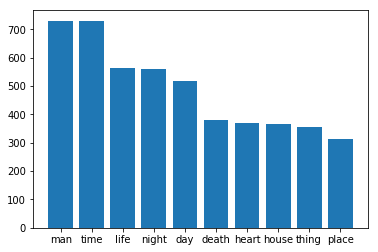

In [107]:
import matplotlib
from matplotlib import pyplot as plt
plt.bar(a,b)